# Задание рубежного контроля и входные данные

- Студент: Койбаев Тамерлан
- Группа: ИУ5-61Б
- Вариант 4
- Датасет: https://www.kaggle.com/carlolepelaars/toy-dataset

### Задание

- Для заданного набора данных построить модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных).
- Для построения моделей использовать методы 1 и 2.
- Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.
- Оценить качество моделей на основе подходящих метрик качества (не менее двух метрик).
- Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей?

### Методы

- Метод 1 - Линейная/логистическая регрессия
- Метод 2 - Случайный лес

## Текстовое описание датасета

В качестве набора данных используется датасет с вымышленными данными. Он имеет следующие атрибуты:

- Number - порядковый номер - индекс для каждой строки
- City - город - город проживания человека
- Gender - пол - пол человека
- Age - возраст - сколько человеку лет
- Income - доход - годовой доход человека
- Illness - болезнь - болеет ли человек

## Импорт библиотек и загрузка данных

Импортируем необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасет:

In [ ]:
data = pd.read_csv('toy_dataset.csv')

Выведем первые 5 строк датасета:

In [ ]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Определим размер датасета:

In [ ]:
data.shape

(150000, 6)

Определим типы столбцов:

In [ ]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

Часть столбцов имеют тип Object. Потребуется преобразование этих столбцов в числовые типы данных.

Уберем предупреждения:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Удаление столбцов

Столбец Number не нужен для дальнейшего анализа, поэтому удалим его:

In [ ]:
data = data.drop(columns=['Number'], axis=1)

In [ ]:
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Преобразование типов данных

Проверим уникальные значения для столбца Сity:

In [ ]:
data['City'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

В качестве значений в столбце City могут быть следующие города: Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin. Таких значений 8.

Проверим уникальные значения для столбца Gender:

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

В столбце Gender 2 варианта - Male или Female.

Проверим уникальные значения для столбца Illness:

In [ ]:
data['Illness'].unique()

array(['No', 'Yes'], dtype=object)

В столбце Illness тоже 2 варианта - No или Yes.

Эти три столбца можно отнести к категориальным признакам.

Уникальные значения категориальных признаков можно кодировать целыми числами. Для этого можно использовать LabelEncoder из Scikit-learn.

Импортируем LabelEncoder:

In [ ]:
from sklearn.preprocessing import LabelEncoder

Преобразуем столбец City:

In [ ]:
letypecity = LabelEncoder()
learrcity = letypecity.fit_transform(data["City"])
data["City"] = learrcity
data = data.astype({"City":"int64"})

Проверим преобразование:

In [ ]:
np.unique(learrcity)

array([0, 1, 2, 3, 4, 5, 6, 7])

Аналогично преобразуем столбцы Gender и Illness:

In [ ]:
letypegender = LabelEncoder()
learrgender = letypegender.fit_transform(data["Gender"])
data["Gender"] = learrgender
data = data.astype({"Gender":"int64"})

In [ ]:
np.unique(learrgender)

array([0, 1])

In [ ]:
letypeill = LabelEncoder()
learrill = letypeill.fit_transform(data["Illness"])
data["Illness"] = learrill
data = data.astype({"Illness":"int64"})

In [ ]:
np.unique(learrill)

array([0, 1])

Выведем типы столбцов после преобразования:

In [ ]:
data.dtypes

City         int64
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

## Проверка наличия пропусков

Проверим наличие пропусков:

In [ ]:
data.isnull().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Пропусков не наблюдается.

Все предварительные преобразования были совершены, можно приступать к построению моделей.

## Разделение выборки на обучающую и тестовую

Разделим выборку по столбцу City с помощью функции train_test_split:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data.City, random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112500, 5), (112500,), (37500, 5), (37500,))

## Построение моделей классификации

### Логистическая регрессия

Построим модель логистической регрессии с помощью LogisticRegression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
targ_logistic = model_logistic.predict(X_test)

### Случайный лес

Построим модель случайного леса с помощью RandomForestClassifier с числом соседей = 5:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_forest = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=100)
model_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, oob_score=True, random_state=100)

In [ ]:
targ_forest = model_forest.predict(X_test)

## Оценка качества моделей

Для оценки качества моделей классификации будем использовать две метрики - Accuracy и матрицу ошибок Confusion Matrix. Именно эти две метрики были выбраны, так как они помогают посчитать процент верно определенных городов и отобразить наглядно классифицированные данные.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Метрика Accuracy

Метрика вычисляет долю в диапазоне от 0 до 1 правильно определенных классов (в нашем случае городов).

Проверим точность по всем городам:

In [ ]:
accuracy_score(y_test, targ_logistic)

0.43216

In [ ]:
accuracy_score(y_test, targ_forest)

0.9998133333333333

Видно, что точность всех классов у модели случайного леса выше, чем у модели логистической регрессии.

Проверим для каждого города из City:

In [ ]:
from typing import Dict, Tuple

In [ ]:
def accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики Accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса,
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values,
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray):
    """
    Вывод метрики Accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Город \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [ ]:
print_accuracy_score_for_classes(y_test, targ_logistic)

Город 	 Accuracy
0 	 0.0
1 	 0.0
2 	 0.7597053553653196
3 	 0.0
4 	 0.41210374639769454
5 	 0.8688758522276835
6 	 0.0
7 	 0.0


In [ ]:
print_accuracy_score_for_classes(y_test, targ_forest)

Город 	 Accuracy
0 	 0.9996776273372018
1 	 0.9975845410628019
2 	 1.0
3 	 0.9998752339363693
4 	 1.0
5 	 1.0
6 	 1.0
7 	 1.0


Наблюдаем более высокую точность у модели случайного леса.

### Метрика Confusion Matrix

Построим соответствующие матрицы:

In [ ]:
confusion_matrix(y_test, targ_logistic, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[    0,     0,   167,     0,   345,  2590,     0,     0],
       [    0,     0,   102,     0,   221,  1747,     0,     0],
       [    0,     0,  3816,     0,     0,  1207,     0,     0],
       [    0,     0,   221,     0,   953,  6841,     0,     0],
       [    0,     0,     0,     0,  1430,  2040,     0,     0],
       [    0,     0,   249,     0,  1405, 10960,     0,     0],
       [    0,     0,    10,     0,   166,  1039,     0,     0],
       [    0,     0,   554,     0,     7,  1430,     0,     0]],
      dtype=int64)

In [ ]:
confusion_matrix(y_test, targ_forest, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[ 3101,     0,     1,     0,     0,     0,     0,     0],
       [    4,  2065,     1,     0,     0,     0,     0,     0],
       [    0,     0,  5023,     0,     0,     0,     0,     0],
       [    0,     0,     0,  8014,     0,     1,     0,     0],
       [    0,     0,     0,     0,  3470,     0,     0,     0],
       [    0,     0,     0,     0,     0, 12614,     0,     0],
       [    0,     0,     0,     0,     0,     0,  1215,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1991]],
      dtype=int64)

Визуализируем их:

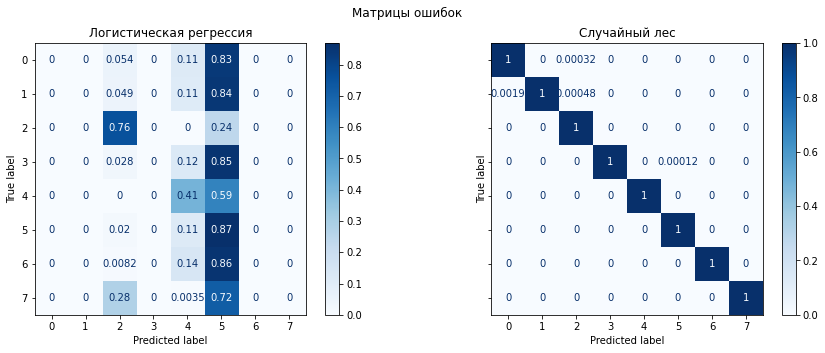

In [ ]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

ConfusionMatrixDisplay.from_estimator(
        model_logistic,
        X_test,
        y_test,
        display_labels=model_logistic.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
        ax=ax[0]
    )

ConfusionMatrixDisplay.from_estimator(
        model_forest,
        X_test,
        y_test,
        display_labels=model_forest.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
        ax=ax[1]
    )

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('Логистическая регрессия')
ax[1].title.set_text('Случайный лес')

Видно, что модель случайного леса обладает высокой точностью.